In [217]:
import numpy as np
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import ast
from networkx.utils import py_random_state
import math
import time
import community as community_louvain

%matplotlib inline

In [243]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [203]:
df = pd.read_csv('Seasons_Stats.csv')
display(df)
df2 = df.dropna(subset=["Player"])

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27435,24690.0,2022.0,Markieff Morris,NaN,NaN,MIA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27436,24690.0,2022.0,Markelle Fultz,NaN,NaN,ORL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27437,24690.0,2022.0,Marcus Smart,NaN,NaN,BOS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27438,24690.0,2022.0,Marcus Garrett,NaN,NaN,MIA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27435,24690.0,2022.0,Markieff Morris,NaN,NaN,MIA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27436,24690.0,2022.0,Markelle Fultz,NaN,NaN,ORL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27437,24690.0,2022.0,Marcus Smart,NaN,NaN,BOS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27438,24690.0,2022.0,Marcus Garrett,NaN,NaN,MIA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unnamed: 0           313.0
Year                1951.0
Player        Paul Arizin*
Pos                     SF
Age                   22.0
Tm                     PHW
G                     65.0
GS                     NaN
MP                     NaN
PER                    NaN
TS%                  0.512
3PAr                   NaN
FTr                  0.609
ORB%                   NaN
DRB%                   NaN
TRB%                   NaN
AST%                   NaN
STL%                   NaN
BLK%                   NaN
TOV%                   NaN
USG%                   NaN
blanl                  NaN
OWS                    9.2
DWS                    4.5
WS                    13.7
WS/48                  NaN
blank2                 NaN
OBPM                   NaN
DBPM                   NaN
BPM                    NaN
VORP                   NaN
FG                   352.0
FGA                  864.0
FG%                  0.407
3P                     NaN
3PA                    NaN
3P%                    NaN
2

In [194]:
G = nx.Graph()

In [195]:
top75 = ['Kareem Abdul-Jabbar', 'Ray Allen', 'Giannis Antetokounmpo', 'Carmelo Anthony', 'Nate Archibald', ' Paul Arizin', 'Charles Barkley', ' Rick Barry', 'Elgin Baylor', ' Dave Bing', 'Larry Bird', 'Kobe Bryant', 'Wilt Chamberlain', 'Bob Cousy', 'Dave Cowens', 'Billy Cunningham', 'Stephen Curry', 'Anthony Davis', 'Dave DeBusschere', 'Clyde Drexler', 'Tim Duncan', 'Kevin Durant', 'Julius Erving', 'Patrick Ewing', 'Walt Frazier', 'Kevin Garnett', 'George Gervin', 'Hal Greer', 'James Harden', 'John Havlicek', 'Elvin Hayes', 'LeBron James', 'Magic Johnson', 'Sam Jones', 'Michael Jordan', 'Jason Kidd', 'Allen Iverson', 'Kawhi Leonard', 'Damian Lillard', 'Jerry Lucas', 'Karl Malone', 'Moses Malone', 'Pete Maravich', 'Bob McAdoo', 'Kevin McHale', 'George Mikan', 'Reggie Miller', 'Earl Monroe', 'Steve Nash', 'Dirk Nowitzki', 'Shaquille O’Neal', 'Hakeem Olajuwon', 'Robert Parish', 'Chris Paul', 'Gary Payton', 'Bob Pettit', 'Paul Pierce', 'Scottie Pippen', 'Willis Reed', 'Oscar Robertson', 'David Robinson', 'Dennis Rodman', 'Bill Russell', 'Dolph Schayes','Bill Sharman','John Stockton', 'Isiah Thomas', 'Nate Thurmond', 'Wes Unseld', 'Dwyane Wade', 'Bill Walton','Jerry West', 'Russell Westbrook', 'Lenny Wilkens', 'Dominique Wilkins', 'James Worthy']

In [106]:
added_player = []
players = []
for x in range(len(df)):
    if df.loc[x]['Tm'] not in ['TOT']:
        player =  df.loc[x]["Player"]
        team =  df.loc[x]["Tm"]
        year = df.loc[x]["Year"]
        idv_player = []
        idv_player.append(player)
        idv_player.append(team)
        idv_player.append(year)
        players.append(idv_player)
    if player not in added_player:
        if player in top75:
            G.add_node(player, type='player', color='red')
        else:
            G.add_node(player, type='player', color='blue')
        added_player.append(player)
            
for player1 in players:
    for player2 in players:
        if player1[1] == player2[1] and player1[2] == player2[2] and player1[0] != player2[0]:
            G.add_edge(player1[0], player2[0])


In [107]:
# print(G.nodes)
print(G.number_of_nodes())
print(G.number_of_edges())
C = np.mean(list(nx.clustering(G).values()))
print(C)

4511
143625
0.5344519920163674


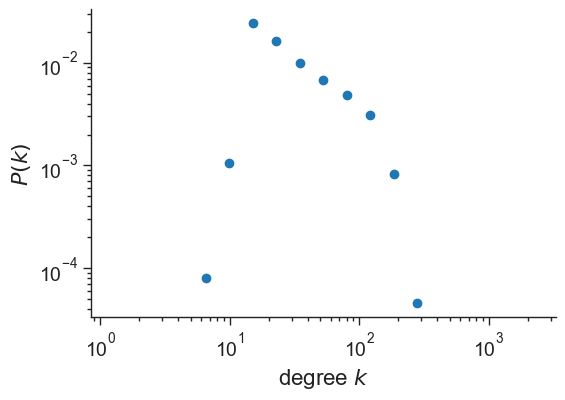

In [108]:
plot_degree_dist(G)

In [109]:
print(nx.is_connected(G))

False


In [110]:
nx.write_graphml(G,'nba.graphml')

In [100]:
subsetGraph = nx.Graph()

In [101]:

added_player = []
players = []
for x in range(14470, len(df)):
    if df.loc[x]['Tm'] not in ['TOT']:
        player = df.loc[x]["Player"]
        team = df.loc[x]["Tm"]
        year = df.loc[x]["Year"]
        idv_player = []
        idv_player.append(player)
        idv_player.append(team)
        idv_player.append(year)
        players.append(idv_player)
        if player not in added_player:
            subsetGraph.add_node(player, type='player', color='green')
            added_player.append(player)
            
for player1 in players:
    for player2 in players:
        if player1[1] == player2[1] and player1[2] == player2[2]:
            subsetGraph.add_edge(player1[0], player2[0])

#nx.write_gexf(G, "test.gexf")


In [102]:
# print(G.nodes)
print(subsetGraph.number_of_nodes())
print(subsetGraph.number_of_edges())

2282
77395


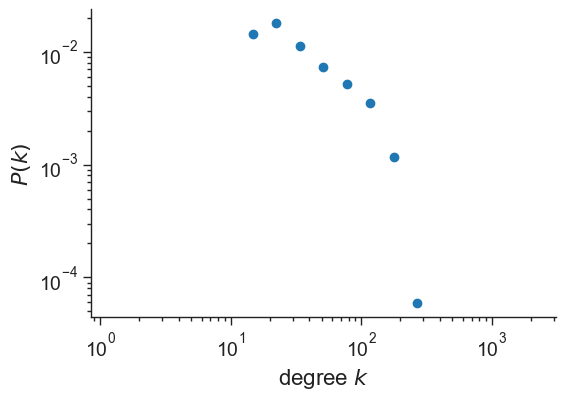

In [103]:
plot_degree_dist(subsetGraph)

In [104]:
nx.write_graphml(subsetGraph,'subset.graphml')

In [105]:
subsetGraph2 = nx.Graph()

In [17]:

added_player = []
players = []
for x in range(22865, len(df)):
    if df.loc[x]['Tm'] not in ['TOT']:
        player = df.loc[x]["Player"]
        team = df.loc[x]["Tm"]
        year = df.loc[x]["Year"]
        idv_player = []
        idv_player.append(player)
        idv_player.append(team)
        idv_player.append(year)
        players.append(idv_player)
        if player not in added_player:
            subsetGraph2.add_node(player, type='player', color='green')
            added_player.append(player)
            
for player1 in players:
    for player2 in players:
        if player1[1] == player2[1] and player1[2] == player2[2]:
            subsetGraph2.add_edge(player1[0], player2[0])

#nx.write_gexf(G, "test.gexf")


In [18]:
print(subsetGraph2.number_of_nodes())
print(subsetGraph2.number_of_edges())

667
12785


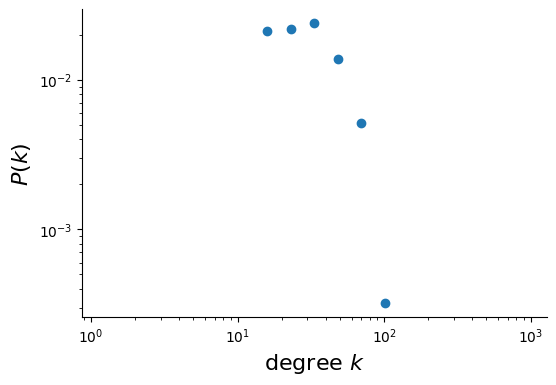

In [19]:
plot_degree_dist(subsetGraph2)

In [20]:
nx.write_graphml(subsetGraph2, "subset2.graphml")

In [248]:
G1 = nx.Graph()

In [249]:
added_player = [] #track added players
players = []        #track all players
for x in range(len(df2)):                   
    if df2.iloc[x]['Tm'] not in ['TOT']:        #team not TOT (two other team, has no meaning)
        player =  df2.iloc[x]["Player"]         
        team =  df2.iloc[x]["Tm"]
        year = df2.iloc[x]["Year"]
        idv_player = []
        if (player in added_player) and (abs(G1.nodes[player]['year'] - year) > 22): #account for two people with same name in two different eras
            player = player+"~"         #add a character to their name so one can tell at a later time.
            idv_player.append(player)
        else:
            idv_player.append(player)
        idv_player.append(team)
        idv_player.append(year)
        players.append(idv_player)
    if (player not in added_player):
        if player in top75:
            G1.add_node(player, type='player', year=year, color='red')      #colour people in top 75 differently (although never made it to visualization)
        else:
            G1.add_node(player, type='player', year=year, color='blue')
        added_player.append(player)
    else:
        if (abs(G1.nodes[player]['year'] - year) > 22):
            if player in top75 or player+'*' in top75:
                G1.add_node(player+"~", type='player', year=year, color='red') #make sure it works for people with * in the name (HOF mark)
            else:
                G1.add_node(player+"~", type='player', year=year, color='blue')  
            added_player.append(player)
             
for player1 in players:
    for player2 in players:
        if (player1[1] == player2[1]) and (player1[2] == player2[2]) and (player1[0] != player2[0]):
            G1.add_edge(player1[0], player2[0], team=player2[1], year=int(player2[2]))


In [250]:
# print(G.nodes)
print(G1.number_of_nodes())
print(G1.number_of_edges())
nx.write_graphml(G1,'nbadestemp.graphml')

4529
139130


In [251]:
#find the partitioning using louvain method provided by networkX. 
partition = community_louvain.best_partition(G1)

In [252]:
#append a tag to each node that puts them into corresponding community partitioning
#calculated above. 
part = tuple(partition.items())
for x in range (len(part)):
    G1.nodes[part[x][0]]['Community'] = part[x][1]
    

In [263]:
# print(G.nodes)
print(G1.number_of_nodes())
print(G1.number_of_edges())
# run louvain method's modularity calculation to find network's modularity value,
# using the partitioning conducted above. 
mod = community_louvain.modularity(partition, G1)
print(mod)
# nx.write_graphml(G1,'nbadestemp1.graphml')

4529
139130
0.16950079541381408


In [254]:
# This is using the source code for double edge swaps defined by networkX. In the code, a value to get the player's 
# debut year has been added to check whether or not the edge is physically possible. 
# The restriction allows the double edge swap to maintain degree distribution as well as keeping the data 
# useful for a comparison, so that the null model actually means something instead of completely random. 

def double_edge_swap(G, nswap=1, max_tries=100, seed=None):
    if G.is_directed():
        raise nx.NetworkXError("double_edge_swap() not defined for directed graphs.")
    if nswap > max_tries:
        raise nx.NetworkXError("Number of swaps > number of tries allowed.")
    if len(G) < 4:
        raise nx.NetworkXError("Graph has less than four nodes.")
    # Instead of choosing uniformly at random from a generated edge list,
    # this algorithm chooses nonuniformly from the set of nodes with
    # probability weighted by degree.
    n = 0
    swapcount = 0
    keys, degrees = zip(*G.degree())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    discrete_sequence = nx.utils.discrete_sequence

    while swapcount < nswap:
        #        if random.random() < 0.5: continue # trick to avoid periodicities?
        # pick two random edges without creating edge list
        # choose source node indices from discrete distribution
        (ui, xi) = discrete_sequence(2, cdistribution=cdf, seed=seed)
        if ui == xi:
            continue  # same source, skip
        u = keys[ui]  # convert index to label
        x = keys[xi]
        # check if years between nodes are apart by more than 22 years. This is not valid.
        if (abs(G.nodes[u]['year'] - G.nodes[x]['year']) >22):
            continue
        # choose target uniformly from neighbors
        v = random.choice(list(G[u]))
        y = random.choice(list(G[x]))
        if v == y:
            continue  # same target, skip
        if (abs(G.nodes[v]['year'] - G.nodes[y]['year']) > 22):
            continue # too far apart in time, skip
        if (x not in G[u]) and (y not in G[v]):  # don't create parallel edges
            G.add_edge(u, x)
            G.add_edge(v, y)
            G.remove_edge(u, v)
            G.remove_edge(x, y)
            swapcount += 1
        if n >= max_tries:
            e = (
                f"Maximum number of swap attempts ({n}) exceeded "
                f"before desired swaps achieved ({nswap})."
            )
            raise nx.NetworkXAlgorithmError(e)
        n += 1
    return G

In [255]:
# print(G.nodes)
print(G1.number_of_nodes())
print(G1.number_of_edges())
#print the mean of clustering coefficient from the graph. 
C = np.mean(list(nx.clustering(G1).values()))
print(C)

4529
139130
0.535118670151975


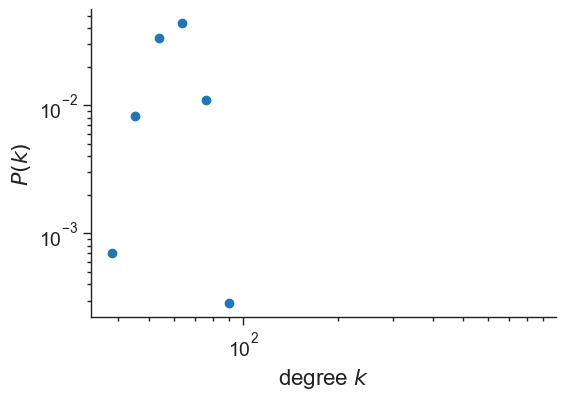

In [256]:
GN = len(G1.nodes())
max_L = GN*(GN-1)/2
actual_L = len(G1.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

In [257]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []

for i in range(1000): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    clustering_ER.append(C_ER)


print(np.mean(clustering_ER))
print(np.std(clustering_ER))


0.01356638496823399
7.632003813286506e-05


In [265]:
# This is just one instance of a random graph. We need to create an ensemble.

modularity_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    parti = community_louvain.best_partition(ER)
    M_ER = community_louvain.modularity(parti, ER)
    modularity_ER.append(M_ER)


print(np.mean(modularity_ER))
print(np.std(modularity_ER))

0.11292829723218391
0.0015805490118907363


In [266]:
# Let's create the ensemble.

modularity_DP = []

for i in range(100): # 1000 is better
    
    DES = double_edge_swap(G1,nswap=10*G1.number_of_edges(),max_tries=10000000)
    parti = community_louvain.best_partition(DES)
    M_DP = community_louvain.modularity(parti, DES)
    modularity_DP.append(M_DP)

    
print(np.mean(modularity_DP))
print(np.std(modularity_DP))

0.27783132007237077
0.0020745343973106755


In [258]:
# Let's create the ensemble.

clustering_DP = []

for i in range(1000): # 1000 is better
    
    double_edge_swap(G1,nswap=10*G1.number_of_edges(),max_tries=10000000)
    C_DP = np.mean(list(nx.clustering(G1).values()))
    clustering_DP.append(C_DP)

    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

0.04718812437065574
0.00022094864168390748


In [259]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

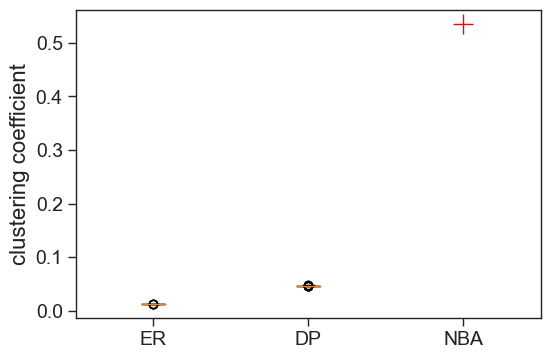

In [272]:
#plot the three clustering coefficient with std deviations
fig = plt.figure(figsize=(6,4))
data = [clustering_ER, clustering_DP]
plt.boxplot(data)
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_ylabel("clustering coefficient")
ax.set_xticks([1,2,3],labels=['ER','DP','NBA'])
plt.xlim([0.5,3.5])
plt.show()

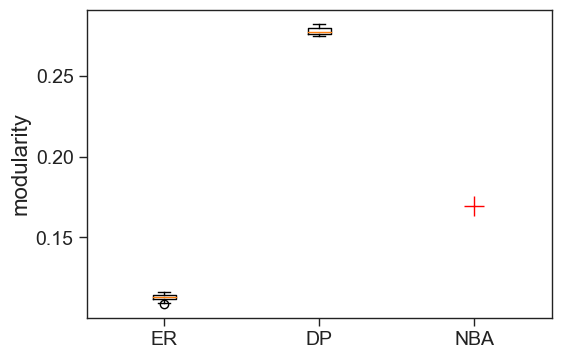

In [274]:
#plot the three modularity values with std deviations
fig = plt.figure(figsize=(6,4))
data = [modularity_ER, modularity_DP]

plt.boxplot(data)
plt.plot(3,mod,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_ylabel("modularity")
ax.set_xticks([1,2,3],labels=['ER','DP','NBA'])
plt.xlim([0.5,3.5])
plt.show()